<a href="https://colab.research.google.com/github/MohmedAAK/fraud-detection/blob/main/Notebook/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pip install

In [ ]:
!pip install gdown

In [ ]:
!pip install xgboost lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


#imports

In [ ]:
#utilties
import pandas as pd
import gdown
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#tf & keras
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding,BatchNormalization,Dropout,Flatten
from keras import backend as K
from keras.models import Sequential
from keras.metrics import Recall
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback
from keras.models import save_model
from keras.utils import to_categorical
#sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import HuberRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
#others
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#fetch the data and load it

In [ ]:
# Replace 'your_google_drive_link' with the actual link to your Google Drive file
google_drive_link = 'https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV'

# Replace 'output_file_name' with the desired name for the file in Colab
output_file_name = 'frad.csv'

# Download the file
gdown.download(google_drive_link, output_file_name)


Downloading...
From: https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
To: /content/frad.csv
100%|██████████| 494M/494M [00:05<00:00, 84.0MB/s]


'frad.csv'

becasue we have too big file we need to read in chunks

In [ ]:

file_path = '/content/frad.csv'

# Specify the chunk size (adjust as needed)
chunk_size = 100000#100k

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Iterate through chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Process each chunk (e.g., perform computations, filter data, etc.)
    # Append the processed chunk to the result DataFrame
    result_df = pd.concat([result_df, chunk], ignore_index=True)

# Process the entire result DataFrame as needed


#initial analysis

In [ ]:
result_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


from matplotlib import pyplot as plt
result_df['step'].plot(kind='hist', bins=20, title='step')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df['oldbalanceOrg'].plot(kind='hist', bins=20, title='oldbalanceOrg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df['newbalanceOrig'].plot(kind='hist', bins=20, title='newbalanceOrig')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
result_df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df.plot(kind='scatter', x='step', y='amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df.plot(kind='scatter', x='amount', y='oldbalanceOrg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df.plot(kind='scatter', x='oldbalanceOrg', y='newbalanceOrig', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df.plot(kind='scatter', x='newbalanceOrig', y='oldbalanceDest', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result_df.sort_values('step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['oldbalanceOrg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result_df.sort_values('step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('oldbalanceOrg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['newbalanceOrig']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result_df.sort_values('step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('newbalanceOrig')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['step']
  ys = series['oldbalanceDest']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = result_df.sort_values('step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('step')
_ = plt.ylabel('oldbalanceDest')

from matplotlib import pyplot as plt
result_df['step'].plot(kind='line', figsize=(8, 4), title='step')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_df['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_df['oldbalanceOrg'].plot(kind='line', figsize=(8, 4), title='oldbalanceOrg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_df['newbalanceOrig'].plot(kind='line', figsize=(8, 4), title='newbalanceOrig')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(result_df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(result_df, x='step', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(result_df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(result_df, x='amount', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(result_df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(result_df, x='oldbalanceOrg', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(result_df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(result_df, x='newbalanceOrig', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
result_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#count of data
len(result_df)

6362620

In [ ]:
#count of nameOrig
len(set(result_df.nameOrig))

6353307

In [ ]:
#rate of nameOrig
len(result_df)/len(set(result_df.nameOrig))

1.0014658507766112

In [ ]:
#count of nameDest
len(set(result_df.nameDest))

2722362

In [ ]:
#rate of nameDest
len(result_df)/len(set(result_df.nameDest))

2.337168973119666

In [ ]:
#counts isFraud
value_counts = result_df['isFraud'].value_counts()

# Display the result
print(value_counts)

0    6354407
1       8213
Name: isFraud, dtype: int64


In [ ]:
#counts isFlaggedFraud
value_counts = result_df['isFlaggedFraud'].value_counts()

# Display the result
print(value_counts)

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


In [ ]:
#connection between nameDest and isFraud=1
count_connections = result_df[result_df['isFraud'] == 1].groupby(['isFraud', 'nameDest']).size().reset_index(name='count')

# Display the result
print(count_connections)


      isFraud     nameDest  count
0           1  C1000039615      1
1           1  C1000367306      1
2           1  C1000407130      1
3           1  C1000836187      1
4           1  C1000855680      1
...       ...          ...    ...
8164        1   C998514614      1
8165        1   C999409522      1
8166        1   C999470580      1
8167        1   C999708230      1
8168        1   C999955448      1

[8169 rows x 3 columns]


In [ ]:
count_connections.describe()

,isFraud,count
count,8169.0,8169.000000
mean,1.0,1.005386
std,0.0,0.073197
min,1.0,1.000000
25%,1.0,1.000000
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,2.000000


In [ ]:
#connection between nameOrig and isFraud=1
count_connections = result_df[result_df['isFraud'] == 1].groupby(['isFraud', 'nameOrig']).size().reset_index(name='count')

# Display the result
print(count_connections)


      isFraud     nameOrig  count
0           1  C1000036340      1
1           1  C1000086512      1
2           1  C1000331499      1
3           1  C1000484178      1
4           1  C1000513158      1
...       ...          ...    ...
8208        1   C998715487      1
8209        1   C998785780      1
8210        1   C998822926      1
8211        1   C999561448      1
8212        1    C99979309      1

[8213 rows x 3 columns]


In [ ]:
count_connections.describe()

,isFraud,count
count,8213.0,8213.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [ ]:
#connection between isFlaggedFraud and isFraud =1
count_connections = result_df[result_df['isFraud'] == 1].groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='count')
# Display the result
print(count_connections)

   isFraud  isFlaggedFraud  count
0        1               0   8197
1        1               1     16


In [ ]:
#connection between isFlaggedFraud and isFraud =0
count_connections = result_df[result_df['isFraud'] == 0].groupby(['isFraud', 'isFlaggedFraud']).size().reset_index(name='count')
# Display the result
print(count_connections)

   isFraud  isFlaggedFraud    count
0        0               0  6354407


In [ ]:
# Display the total number of null values in the entire DataFrame
total_null_count = result_df.isnull().sum().sum()

# Display the result
print(f'Total number of null values in the DataFrame: {total_null_count}')


Total number of null values in the DataFrame: 0


In [ ]:
df = result_df.copy()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns in the copied DataFrame for outliers detection
label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [ ]:
#outliers detection
z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Display rows with outliers
print(df[outliers])


Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [ ]:
outliers = (abs_z_scores > 3).any(axis=1)
# any variables should be outliers
# Display rows with outliers
print(df[outliers])


         step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
2           1     4      181.00   1002156         181.00             0.0   
3           1     1      181.00   5828262         181.00             0.0   
84          1     4   379856.23   1477099           0.00             0.0   
88          1     4   761507.39   4421346           0.00             0.0   
89          1     4  1429051.47   1708442           0.00             0.0   
...       ...   ...         ...       ...            ...             ...   
6362615   743     1   339682.13   5651847      339682.13             0.0   
6362616   743     4  6311409.28   1737278     6311409.28             0.0   
6362617   743     1  6311409.28    533958     6311409.28             0.0   
6362618   743     4   850002.52   2252932      850002.52             0.0   
6362619   743     1   850002.52    919229      850002.52             0.0   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
2         

In [ ]:
threshold = 3
min_required_variables = 4  # 4 vars should be outliers
# Check if at least min_required_variables are above the threshold for each row
outliers = (abs_z_scores > threshold).sum(axis=1) >= min_required_variables
print(df[outliers])

         step  type       amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
4519        4     0     17058.54   2456388    10455309.26     10472367.80   
4968        5     0    360262.92   1951511    11163522.31     11523785.23   
4973        5     0    281196.15   4944403    12266938.44     12548134.60   
6682        6     0    455846.84    454360     9514853.25      9970700.10   
6687        6     0    335389.99   3703481    11488141.21     11823531.20   
...       ...   ...          ...       ...            ...             ...   
6362580   741     4  10000000.00   5986993    25674547.89     15674547.89   
6362581   741     1  10000000.00   5292744    10000000.00            0.00   
6362582   741     4  10000000.00   3106908    15674547.89      5674547.89   
6362583   741     1  10000000.00   2193920    10000000.00            0.00   
6362584   741     4   5674547.89   6327800     5674547.89      5674547.89   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud 

In [ ]:
threshold = 3
min_required_variables = 5  # 5 vars should be outliers

# Check if at least min_required_variables are above the threshold for each row
outliers = (abs_z_scores > threshold).sum(axis=1) >= min_required_variables
print(df[outliers])

         step  type       amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
3163675   237     1  10000000.00   5842417    10000000.00            0.00   
5996407   425     4  10000000.00   5332564    19585040.37     19585040.37   
5996409   425     4   9585040.37   4552191    19585040.37     19585040.37   
6061826   501     1  10000000.00   4641471    10000000.00            0.00   
6281482   646     4  10000000.00   2958273    10399045.08     10399045.08   
6296008   671     4  10000000.00   6078199    33441041.46     23441041.46   
6296010   671     4  10000000.00   4628958    23441041.46     13441041.46   
6299378   681     0    183993.31   1908495    10097452.62     10281445.93   
6318799   687     0    370065.48   1914898    19284027.27     19654092.75   
6322208   688     0     35433.05   4516685    12577349.97     12612783.03   
6323955   688     0    548578.43   2243972    12043963.59     12592542.01   
6350476   695     0    118557.66   6165233     9815198.59      9933756.25   

#Q1 Data cleaning including missing values, outliers and multi-collinearity?

## answer: while exploring and data cleaning, I found out there is
    -no missing data (NAN)
    -there are outliers and small cases of multi-collinearity.
    -there are a number of cases of fraud that can be outliers
    -case of huge class imbalance.
    -there is almost a unique customer name
    -there is a repetitive destination name with number near half of the data
    -isFlaggedFraud is only 16 cases and connected only with Fraud label

## This was a bad case because now, it is irresponsible to delete the outliers  or transform it



#modling ML approaches

##data handling

In [ ]:
#step	type	amount	nameOrig	oldbalanceOrg	newbalanceOrig	nameDest	oldbalanceDest	newbalanceDest	isFraud	isFlaggedFraud

In [ ]:
# Assuming 'df' is your DataFrame

# Separate features (X) and target variable (y)
X = result_df.drop('isFraud', axis=1)
y = result_df['isFraud']

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Encoding categorical columns
label_encoder = LabelEncoder()
X[categorical_columns] = X[categorical_columns].apply(label_encoder.fit_transform)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


# Standardizing numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Display the processed data
print("Encoded and Standardized Training Features (X_train):")
print(X_train.head())

print("\nEncoded and Standardized Testing Features (X_test):")
print(X_test.head())

print("\nTraining Target Variable (y_train):")
print(y_train.head())

print("\nTesting Target Variable (y_test):")
print(y_test.head())


Encoded and Standardized Training Features (X_train):
             step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
292779  -1.604574     3 -0.282169   4651389      -0.273409       -0.280706   
499763  -1.569442     3 -0.287248   2899744      -0.288733       -0.292451   
2970411 -0.086865     1  0.300938   5015444      -0.288733       -0.292451   
3137549 -0.051733     3 -0.286868   2027565      -0.288733       -0.292451   
1500682 -0.705191     0  0.063257   2317380       4.229095        4.244653   

         nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
292779    1297066       -0.323308       -0.333104       -0.001773  
499763    1093957       -0.323308       -0.333104       -0.001773  
2970411    291773       -0.179414       -0.101671       -0.001773  
3137549   1161367       -0.323308       -0.333104       -0.001773  
1500682    332052        0.393047        0.270692       -0.001773  

Encoded and Standardized Testing Features (X_test):
             ste

##CatBoost (best model)

In [ ]:
# Instantiate CatBoost Classifier
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

# Train the model
catboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)

print("\nRecall Score:", recall)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)


Confusion Matrix:
[[1270805      76]
 [    222    1421]]

Recall Score: 0.8648813146682898
Accuracy Score: 0.9997658197409244
Precision Score: 0.9492317969271877


## Decision Tree (secound best model)

In [ ]:
# Instantiate the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
tree_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)

print("\nRecall Score:", recall)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)


Confusion Matrix:
[[1270678     203]
 [    230    1413]]

Recall Score: 0.8600121728545344
Accuracy Score: 0.9996597313685243
Precision Score: 0.8743811881188119


## Decision Tree fetures importance

Feature ranking:
oldbalanceOrg: 0.3775614611361099
newbalanceDest: 0.20995915633805132
amount: 0.12968531076372977
newbalanceOrig: 0.09198790264763256
oldbalanceDest: 0.07751136567222255
step: 0.06139931464450403
type: 0.02004569871091417
nameDest: 0.017813652198849946
nameOrig: 0.013732019579459133
isFlaggedFraud: 0.0003041183085265639


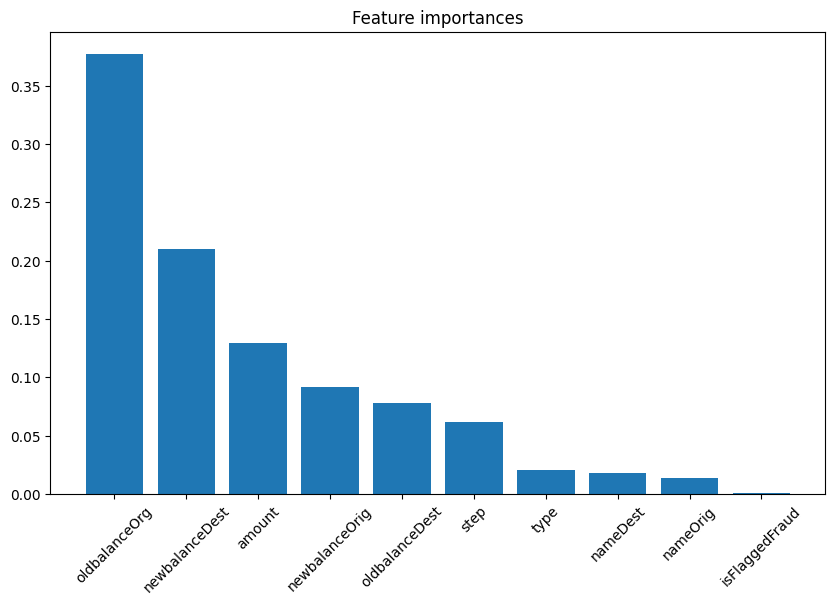

In [ ]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {feature_importances[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.show()

##class weight

In [ ]:
# Replace `classes=[0, 1]` with the actual class labels in your dataset if needed
class_labels = [0, 1]

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=class_labels, y=y)

# Convert to a dictionary for use in model training
class_weights_dict = dict(zip(class_labels, class_weights))

print("Class Weights:", class_weights_dict)


Class Weights: {0: 0.5006462444095885, 1: 387.35054182393765}


## weighted random forest

In [ ]:
# Instantiate the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42, class_weight={0: 0.05006462444095885, 1: 2*387.35054182393765})

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)

print("\nRecall Score:", recall)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)


Confusion Matrix:
[[1270863      18]
 [    380    1263]]

Recall Score: 0.768715763846622
Accuracy Score: 0.9996872357613688
Precision Score: 0.9859484777517564


##Isolation Forest model

In [ ]:
# Instantiate Isolation Forest for outlier detection
iso_forest = IsolationForest(random_state=42)

# Fit and predict outliers
outliers = iso_forest.fit_predict(X_train)

# Remove outliers from the training set
X_train_no_outliers = X_train[outliers == 1]
y_train_no_outliers = y_train[outliers == 1]

# Now, you can train your classification model on the data without outliers
# Instantiate the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42, class_weight={0: 0.05006462444095885, 1: 10*387.35054182393765})

# Train the model
random_forest_classifier.fit(X_train_no_outliers, y_train_no_outliers)

# Predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)

print("\nRecall Score:", recall)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)

Confusion Matrix:
[[1270860      21]
 [    860     783]]

Recall Score: 0.4765672550213025
Accuracy Score: 0.9993076751401152
Precision Score: 0.9738805970149254


##XGBoost

In [ ]:
# Instantiate XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)


# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)

print("\nRecall Score:", recall)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)


Confusion Matrix:
[[1270820      61]
 [    247    1396]]

Recall Score: 0.8496652465003043
Accuracy Score: 0.9997579613429688
Precision Score: 0.9581331503088538


##LightGBM

In [ ]:

# Instantiate LightGBM Classifier
lgb_classifier = LGBMClassifier(random_state=42)

# Train the model
lgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = lgb_classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)

print("\nRecall Score:", recall)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)

[LightGBM] [Info] Number of positive: 6570, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001291 -> initscore=-6.651247
[LightGBM] [Info] Start training from score -6.651247
Confusion Matrix:
[[1269806    1075]
 [    942     701]]

Recall Score: 0.4266585514303104
Accuracy Score: 0.9984149611323637
Precision Score: 0.3947072072072072


##Naive Bayes classifier

In [ ]:
# Instantiate the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the model
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)


# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)

print("\nRecall Score:", recall)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)


Confusion Matrix:
[[1270881       0]
 [   1643       0]]

Recall Score: 0.0
Accuracy Score: 0.9987088652159016
Precision Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Q2 Describe your fraud detection model in elaboration.



##answer: at the beginning, I choose the ML approach
## by dealing with outliers by using
    -Robust Machine Learning Models

    alternativity solution:
    -Robust Deep Learning Models

## So I tested all Robust Machine Learning starting with tree-based models yet the best results were only within the normal decision tree model. This led me to start thinking about the Deep learning model in the category of RNN, i chose the LSTM model because in my point of view is the best option due to the nature of the sequence data and the nature of the problem.

## Also my first impression thinking about data was that it is a signal or time series problem and I wanted to check if each customer has a set of transactions so I can convert the nature of data to a list of signals which seems good until I did analysis.

##yet thinking of data as in the logic of sequences of signals was a good idea if we thought about it, i want to catch a fraud pattern and fast fraud transactions.


##Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) architecture designed to capture and model sequential patterns in data. LSTMs are particularly effective in tasks involving capturing long-term dependencies and remembering past information is crucial.

##which fits our problem description, a sequential Nature of Transactions: data is sequential, representing a series of events over time.

## So this why I chose the model is LSTM, it gets a 97 recall average macro test unseen score.


#Q3 How did you select variables to be included in the model?


## I did not choose but if I did, I would choose from the decision tree model feature importance which is the best model in ML approaches that I tested and it is robust to outliers.

##why did not i choose?  well, I did not have to.

##to begin with, I tested ML to check if there is an easy solution but I thought from the beginning, it won't work for certain reasons like:

    -too many outliers from the fraud class
    -too much imbalance and fraud class is the smallest
    -too few features
    -after the feature importance from decision tree model, only one feature seems worthless the rest have potential

## All signs were pushing me to a deep learning solution which does not require feature selection because it will give each feature by default a weight

#using deep learning

In [ ]:
# split the data to train and validation
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

In [ ]:
#it should change the shape but not needed now it can be ignnored
X_train_arr=np.array(X_train_)
X_train_arr=np.reshape(X_train_arr,(X_train_arr.shape[0],X_train_arr.shape[1]))

In [ ]:
X_train_arr.shape

(4072076, 10)

In [ ]:
y_train_.shape

(4072076,)

##experiment 1 initail 0.95 recall average

In [ ]:
#class_weights
class_weights = {0: 0.5006462444095885, 1: (387.35054182393765)}
# LSTM model with custom recall metrics
lstm_model = Sequential()
lstm_model.add(LSTM(200, input_shape=(X_train_arr.shape[1], 1),return_sequences=True))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(100,return_sequences=True))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.4))
lstm_model.add(Flatten())
lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Dropout(0.1))#dropout by 10 precent
lstm_model.add(Dense(2, activation='softmax'))
y_classes_train = to_categorical(y_train_, num_classes=2)
y_classes_val = to_categorical(y_val, num_classes=2)
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy",Recall(name="re"),Recall(name="re0",class_id=0),Recall(name="re1",class_id=1)])

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
checkpoint1= ModelCheckpoint('best_modelre.h5', monitor='val_re', save_best_only=True, mode='max', verbose=1)
recall_callback = RecallCallback(validation_data=(X_val, y_val))

# Train the model
lstm_model.fit(X_train_, y_classes_train, epochs=50, batch_size=128*32*16, validation_data=(X_val, y_classes_val), class_weight=class_weights, callbacks=[checkpoint,checkpoint1])


Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 0.6098 - accuracy: 0.7171 - re: 0.7171 - re0: 0.7171 - re1: 0.6790
Epoch 1: val_loss improved from inf to 0.52692, saving model to best_model.h5

Epoch 1: val_re improved from -inf to 0.99794, saving model to best_modelre.h5
63/63 [==============================] - 65s 956ms/step - loss: 0.6098 - accuracy: 0.7171 - re: 0.7171 - re0: 0.7171 - re1: 0.6790 - val_loss: 0.5269 - val_accuracy: 0.9979 - val_re: 0.9979 - val_re0: 0.9992 - val_re1: 0.0510
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - ETA: 0s - loss: 0.5130 - accuracy: 0.8024 - re: 0.8024 - re0: 0.8025 - re1: 0.7038
Epoch 2: val_loss improved from 0.52692 to 0.32761, saving model to best_model.h5

Epoch 2: val_re did not improve from 0.99794
63/63 [==============================] - 57s 907ms/step - loss: 0.5130 - accuracy: 0.8024 - re: 0.8024 - re0: 0.8025 - re1: 0.7038 - val_loss: 0.3276 - val_accuracy: 0.9961 - val_re: 0.9961 - val_re0: 0.9972 - val_re1: 0.1225
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 0.4491 - accuracy: 0.8584 - re: 0.8584 - re0: 0.8585 - re1: 0.7283
Epoch 3: val_loss improved from 0.32761 to 0.26942, saving model to best_model.h5

Epoch 3: val_re did not improve from 0.99794
63/63 [==============================] - 57s 911ms/step - loss: 0.4491 - accuracy: 0.8584 - re: 0.8584 - re0: 0.8585 - re1: 0.7283 - val_loss: 0.2694 - val_accuracy: 0.9923 - val_re: 0.9923 - val_re0: 0.9932 - val_re1: 0.2382
Epoch 4/50
63/63 [===============

KeyboardInterrupt: 

In [ ]:
lstm_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 10, 200)           161600    
                                                                 
 batch_normalization_91 (Ba  (None, 10, 200)           800       
 tchNormalization)                                               
                                                                 
 dropout_66 (Dropout)        (None, 10, 200)           0         
                                                                 
 lstm_67 (LSTM)              (None, 10, 100)           120400    
                                                                 
 batch_normalization_92 (Ba  (None, 10, 100)           400       
 tchNormalization)                                               
                                                                 
 dropout_67 (Dropout)        (None, 10, 100)         

In [ ]:
# Load the model
loaded_model = load_model('/content/best_model13.h5')
y_pred=loaded_model.predict(X_test,batch_size=128*32*16)
predicted_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)
classification_rep = classification_report(y_test, predicted_classes)

# Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9499451483822702

Confusion Matrix:
[[1207262   63619]
 [     77    1566]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.95      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



##experiment 2 last 0.97 recall average with improvemnt possiblity

In [ ]:
#call back to calculate the recall macro average and save both epochs and best reacall
class AverageRecallCallback(Callback):
    def __init__(self, validation_data=None):
        super(AverageRecallCallback, self).__init__()
        self.validation_data = validation_data
        self.best_average_recall = -1  # Initialize with a value less than 0
        self.epoch_s = 0
    def on_epoch_end(self, epoch, logs=None):
        if self.validation_data is None:
            return

        X_val, y_val = self.validation_data
        y_pred = self.model.predict(X_val, batch_size=128*32*16)

        # Convert y_val and y_pred to integer format
        y_val_classes = y_val.argmax(axis=1)
        y_pred_classes = y_pred.argmax(axis=1)

        # Calculate average recall
        average_recall = recall_score(y_val_classes, y_pred_classes, average='macro')
        classification_rep = classification_report(y_val_classes, y_pred_classes)
        print(classification_rep)
        # Update the best average recall and save the model if improved
        if average_recall > self.best_average_recall:
            self.best_average_recall = average_recall
            self.model.save('best_model_'+str(average_recall)+'_.h5')  # Save the model
        self.model.save('epoch_model_'+str(self.epoch_s)+'_.h5')
        self.epoch_s=self.epoch_s+1 # Save the model
        logs['val_average_recall'] = average_recall
        print(f'\nEpoch {epoch + 1}, Validation Average Recall: {average_recall:.4f}, Best Average Recall: {self.best_average_recall:.4f}')


class_weights = {0: 0.5006462444095885, 1: (387.35054182393765)}
# LSTM model with custom recall metrics
lstm_model = Sequential()
lstm_model.add(LSTM(200, input_shape=(X_train_arr.shape[1], 1),return_sequences=True))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(100,return_sequences=True))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.4))
lstm_model.add(Flatten())
lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(BatchNormalization())
#lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Dropout(0.1))#dropout by 10 precent
lstm_model.add(Dense(2, activation='softmax'))
y_classes_train = to_categorical(y_train_, num_classes=2)
y_classes_val = to_categorical(y_val, num_classes=2)
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy",Recall(name="re")])

#checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
#checkpoint1= ModelCheckpoint('best_modelre.h5', monitor='val_re', save_best_only=True, mode='max', verbose=1)

average_recall_callback = AverageRecallCallback(validation_data=(X_val, y_classes_val))
# Train the model
lstm_model.fit(X_train_, y_classes_train, epochs=20, batch_size=128*32*16, validation_data=(X_val, y_classes_val), class_weight=class_weights, callbacks=[average_recall_callback])


Epoch 1/20
 6/63 [=>............................] - ETA: 39s - loss: 0.8656 - accuracy: 0.5757 - re: 0.5757

16/16 [==============================] - 4s 197ms/step
              precision    recall  f1-score   support

           0       1.00      0.08      0.14   1016706
           1       0.00      0.98      0.00      1314

    accuracy                           0.08   1018020
   macro avg       0.50      0.53      0.07   1018020
weighted avg       1.00      0.08      0.14   1018020


Epoch 1, Validation Average Recall: 0.5279, Best Average Recall: 0.5279
63/63 [==============================] - 61s 899ms/step - loss: 0.6726 - accuracy: 0.6759 - re: 0.6759 - val_loss: 0.7671 - val_accuracy: 0.0783 - val_re: 0.0783 - val_average_recall: 0.5279
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 213ms/step
              precision    recall  f1-score   support

           0       1.00      0.64      0.78   1016706
           1       0.00      0.79      0.01      1314

    accuracy                           0.64   1018020
   macro avg       0.50      0.72      0.39   1018020
weighted avg       1.00      0.64      0.78   1018020


Epoch 2, Validation Average Recall: 0.7151, Best Average Recall: 0.7151
63/63 [==============================] - 58s 920ms/step - loss: 0.5601 - accuracy: 0.7563 - re: 0.7563 - val_loss: 0.6790 - val_accuracy: 0.6412 - val_re: 0.6412 - val_average_recall: 0.7151
Epoch 3/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 212ms/step
              precision    recall  f1-score   support

           0       1.00      0.86      0.93   1016706
           1       0.01      0.67      0.01      1314

    accuracy                           0.86   1018020
   macro avg       0.50      0.77      0.47   1018020
weighted avg       1.00      0.86      0.92   1018020


Epoch 3, Validation Average Recall: 0.7665, Best Average Recall: 0.7665
63/63 [==============================] - 57s 900ms/step - loss: 0.5107 - accuracy: 0.8087 - re: 0.8087 - val_loss: 0.5450 - val_accuracy: 0.8622 - val_re: 0.8622 - val_average_recall: 0.7665
Epoch 4/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 215ms/step
              precision    recall  f1-score   support

           0       1.00      0.56      0.71   1016706
           1       0.00      0.86      0.00      1314

    accuracy                           0.56   1018020
   macro avg       0.50      0.71      0.36   1018020
weighted avg       1.00      0.56      0.71   1018020


Epoch 4, Validation Average Recall: 0.7059, Best Average Recall: 0.7665
63/63 [==============================] - 59s 935ms/step - loss: 0.4704 - accuracy: 0.8459 - re: 0.8459 - val_loss: 0.6788 - val_accuracy: 0.5569 - val_re: 0.5569 - val_average_recall: 0.7059
Epoch 5/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 213ms/step
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1016706
           1       0.01      0.73      0.02      1314

    accuracy                           0.89   1018020
   macro avg       0.50      0.81      0.48   1018020
weighted avg       1.00      0.89      0.94   1018020


Epoch 5, Validation Average Recall: 0.8123, Best Average Recall: 0.8123
63/63 [==============================] - 55s 875ms/step - loss: 0.4246 - accuracy: 0.8665 - re: 0.8665 - val_loss: 0.3672 - val_accuracy: 0.8924 - val_re: 0.8924 - val_average_recall: 0.8123
Epoch 6/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 218ms/step
              precision    recall  f1-score   support

           0       1.00      0.86      0.92   1016706
           1       0.01      0.78      0.01      1314

    accuracy                           0.86   1018020
   macro avg       0.50      0.82      0.47   1018020
weighted avg       1.00      0.86      0.92   1018020


Epoch 6, Validation Average Recall: 0.8209, Best Average Recall: 0.8209
63/63 [==============================] - 59s 944ms/step - loss: 0.3567 - accuracy: 0.9024 - re: 0.9024 - val_loss: 0.4985 - val_accuracy: 0.8600 - val_re: 0.8600 - val_average_recall: 0.8209
Epoch 7/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 217ms/step
              precision    recall  f1-score   support

           0       1.00      0.68      0.81   1016706
           1       0.00      0.72      0.01      1314

    accuracy                           0.68   1018020
   macro avg       0.50      0.70      0.41   1018020
weighted avg       1.00      0.68      0.81   1018020


Epoch 7, Validation Average Recall: 0.7045, Best Average Recall: 0.8209
63/63 [==============================] - 59s 937ms/step - loss: 0.2834 - accuracy: 0.9236 - re: 0.9236 - val_loss: 0.5757 - val_accuracy: 0.6846 - val_re: 0.6846 - val_average_recall: 0.7045
Epoch 8/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 218ms/step
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1016706
           1       0.01      0.75      0.02      1314

    accuracy                           0.90   1018020
   macro avg       0.50      0.83      0.48   1018020
weighted avg       1.00      0.90      0.95   1018020


Epoch 8, Validation Average Recall: 0.8256, Best Average Recall: 0.8256
63/63 [==============================] - 59s 935ms/step - loss: 0.2704 - accuracy: 0.9166 - re: 0.9166 - val_loss: 0.2844 - val_accuracy: 0.9029 - val_re: 0.9029 - val_average_recall: 0.8256
Epoch 9/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 216ms/step
              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1016706
           1       0.01      0.80      0.02      1314

    accuracy                           0.91   1018020
   macro avg       0.51      0.85      0.49   1018020
weighted avg       1.00      0.91      0.95   1018020


Epoch 9, Validation Average Recall: 0.8540, Best Average Recall: 0.8540
63/63 [==============================] - 59s 937ms/step - loss: 0.2235 - accuracy: 0.9323 - re: 0.9323 - val_loss: 0.2249 - val_accuracy: 0.9125 - val_re: 0.9125 - val_average_recall: 0.8540
Epoch 10/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 218ms/step
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1016706
           1       0.01      0.84      0.02      1314

    accuracy                           0.89   1018020
   macro avg       0.50      0.87      0.48   1018020
weighted avg       1.00      0.89      0.94   1018020


Epoch 10, Validation Average Recall: 0.8664, Best Average Recall: 0.8664
63/63 [==============================] - 59s 936ms/step - loss: 0.2067 - accuracy: 0.9298 - re: 0.9298 - val_loss: 0.2572 - val_accuracy: 0.8926 - val_re: 0.8926 - val_average_recall: 0.8664
Epoch 11/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 217ms/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1016706
           1       0.02      0.84      0.04      1314

    accuracy                           0.94   1018020
   macro avg       0.51      0.89      0.50   1018020
weighted avg       1.00      0.94      0.97   1018020


Epoch 11, Validation Average Recall: 0.8917, Best Average Recall: 0.8917
63/63 [==============================] - 59s 935ms/step - loss: 0.1775 - accuracy: 0.9350 - re: 0.9350 - val_loss: 0.1820 - val_accuracy: 0.9430 - val_re: 0.9430 - val_average_recall: 0.8917
Epoch 12/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 217ms/step
              precision    recall  f1-score   support

           0       1.00      0.87      0.93   1016706
           1       0.01      1.00      0.02      1314

    accuracy                           0.87   1018020
   macro avg       0.50      0.93      0.47   1018020
weighted avg       1.00      0.87      0.93   1018020


Epoch 12, Validation Average Recall: 0.9310, Best Average Recall: 0.9310
63/63 [==============================] - 57s 911ms/step - loss: 0.1610 - accuracy: 0.9381 - re: 0.9381 - val_loss: 0.2649 - val_accuracy: 0.8652 - val_re: 0.8652 - val_average_recall: 0.9310
Epoch 13/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 215ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1016706
           1       0.02      0.91      0.05      1314

    accuracy                           0.95   1018020
   macro avg       0.51      0.93      0.51   1018020
weighted avg       1.00      0.95      0.98   1018020


Epoch 13, Validation Average Recall: 0.9309, Best Average Recall: 0.9310
63/63 [==============================] - 56s 891ms/step - loss: 0.1588 - accuracy: 0.9366 - re: 0.9366 - val_loss: 0.1104 - val_accuracy: 0.9538 - val_re: 0.9538 - val_average_recall: 0.9309
Epoch 14/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 217ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91   1016706
           1       0.01      0.87      0.01      1314

    accuracy                           0.83   1018020
   macro avg       0.50      0.85      0.46   1018020
weighted avg       1.00      0.83      0.91   1018020


Epoch 14, Validation Average Recall: 0.8498, Best Average Recall: 0.9310
63/63 [==============================] - 58s 923ms/step - loss: 0.1473 - accuracy: 0.9408 - re: 0.9408 - val_loss: 0.3179 - val_accuracy: 0.8321 - val_re: 0.8321 - val_average_recall: 0.8498
Epoch 15/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 217ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.97   1016706
           1       0.02      0.94      0.04      1314

    accuracy                           0.93   1018020
   macro avg       0.51      0.94      0.50   1018020
weighted avg       1.00      0.93      0.97   1018020


Epoch 15, Validation Average Recall: 0.9362, Best Average Recall: 0.9362
63/63 [==============================] - 58s 919ms/step - loss: 0.1453 - accuracy: 0.9392 - re: 0.9392 - val_loss: 0.1818 - val_accuracy: 0.9348 - val_re: 0.9348 - val_average_recall: 0.9362
Epoch 16/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 214ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1016706
           1       0.04      0.94      0.07      1314

    accuracy                           0.97   1018020
   macro avg       0.52      0.96      0.53   1018020
weighted avg       1.00      0.97      0.98   1018020


Epoch 16, Validation Average Recall: 0.9555, Best Average Recall: 0.9555
63/63 [==============================] - 55s 881ms/step - loss: 0.1315 - accuracy: 0.9453 - re: 0.9453 - val_loss: 0.0808 - val_accuracy: 0.9666 - val_re: 0.9666 - val_average_recall: 0.9555
Epoch 17/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 215ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1016706
           1       0.05      0.92      0.10      1314

    accuracy                           0.98   1018020
   macro avg       0.53      0.95      0.54   1018020
weighted avg       1.00      0.98      0.99   1018020


Epoch 17, Validation Average Recall: 0.9471, Best Average Recall: 0.9555
63/63 [==============================] - 55s 881ms/step - loss: 0.1317 - accuracy: 0.9399 - re: 0.9399 - val_loss: 0.0658 - val_accuracy: 0.9778 - val_re: 0.9778 - val_average_recall: 0.9471
Epoch 18/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 218ms/step
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1016706
           1       0.01      1.00      0.03      1314

    accuracy                           0.90   1018020
   macro avg       0.51      0.95      0.49   1018020
weighted avg       1.00      0.90      0.95   1018020


Epoch 18, Validation Average Recall: 0.9510, Best Average Recall: 0.9555
63/63 [==============================] - 57s 915ms/step - loss: 0.1246 - accuracy: 0.9500 - re: 0.9500 - val_loss: 0.1828 - val_accuracy: 0.9022 - val_re: 0.9022 - val_average_recall: 0.9510
Epoch 19/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 219ms/step
              precision    recall  f1-score   support

           0       1.00      0.86      0.92   1016706
           1       0.01      0.90      0.02      1314

    accuracy                           0.86   1018020
   macro avg       0.50      0.88      0.47   1018020
weighted avg       1.00      0.86      0.92   1018020


Epoch 19, Validation Average Recall: 0.8786, Best Average Recall: 0.9555
63/63 [==============================] - 59s 938ms/step - loss: 0.1191 - accuracy: 0.9455 - re: 0.9455 - val_loss: 0.2618 - val_accuracy: 0.8577 - val_re: 0.8577 - val_average_recall: 0.8786
Epoch 20/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 3s 215ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.96   1016706
           1       0.02      0.96      0.03      1314

    accuracy                           0.93   1018020
   macro avg       0.51      0.94      0.50   1018020
weighted avg       1.00      0.93      0.96   1018020


Epoch 20, Validation Average Recall: 0.9421, Best Average Recall: 0.9555
63/63 [==============================] - 55s 879ms/step - loss: 0.1237 - accuracy: 0.9443 - re: 0.9443 - val_loss: 0.1402 - val_accuracy: 0.9269 - val_re: 0.9269 - val_average_recall: 0.9421


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


i forget to save the model histroy , np dealing with that by google sheet and notebook++ to access the loss and plot them



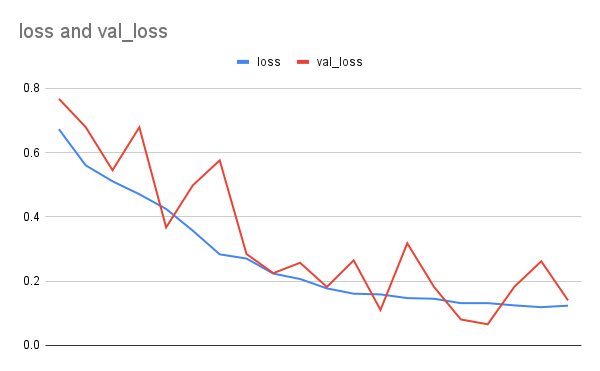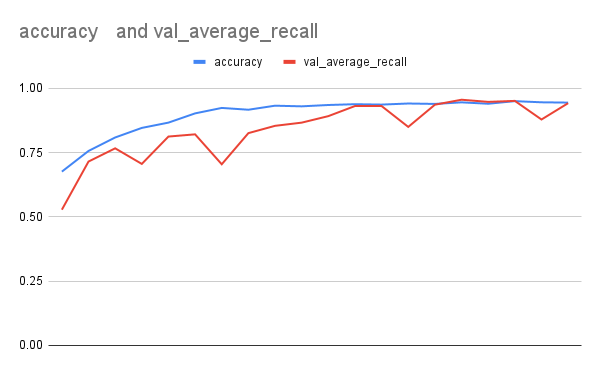

### we go intersting results in best recall mean and best epoch in my opinion

here is best recall mean with better reults than previous

In [ ]:
# Load the model
loaded_model = load_model('/content/best_model_0.9555153276037189_.h5')
y_pred=loaded_model.predict(X_test,batch_size=128*32*16)
predicted_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)
classification_rep = classification_report(y_test, predicted_classes)

# Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

20/20 [==============================] - 5s 197ms/step
Accuracy: 0.9667416881724824

Confusion Matrix:
[[1228634   42247]
 [     75    1568]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270881
           1       0.04      0.95      0.07      1643

    accuracy                           0.97   1272524
   macro avg       0.52      0.96      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524



here is the optimum solution , lowest loss possible but: is it worth it to suspect 10% of total transactions (124005)?

In [ ]:
# Load the model
loaded_model = load_model('/content/epoch_model_17_.h5')
y_pred=loaded_model.predict(X_test,batch_size=128*32*16)
predicted_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)
classification_rep = classification_report(y_test, predicted_classes)

# Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

20/20 [==============================] - 5s 198ms/step
Accuracy: 0.9025487927929061

Confusion Matrix:
[[1146876  124005]
 [      4    1639]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1270881
           1       0.01      1.00      0.03      1643

    accuracy                           0.90   1272524
   macro avg       0.51      0.95      0.49   1272524
weighted avg       1.00      0.90      0.95   1272524



if it is not the best, how about improving by lowering the suspect by 5% and lose 1% of fraud by using ensemble between best two models

In [ ]:
# Load the first model
model1 = load_model('/content/best_model_0.9555153276037189_.h5')
y_pred1 = model1.predict(X_test, batch_size=128*32*16)

# Load the second model
model2 = load_model('/content/epoch_model_17_.h5')
y_pred2 = model2.predict(X_test, batch_size=128*32*16)

# Ensemble the predictions (average the probabilities)
ensemble_pred = (y_pred1 + y_pred2) / 2

# Make predictions based on the ensemble probabilities
ensemble_classes = np.argmax(ensemble_pred, axis=1)

# Evaluate the ensemble predictions
ensemble_accuracy = accuracy_score(y_test, ensemble_classes)
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_classes)
ensemble_classification_rep = classification_report(y_test, ensemble_classes)

# Display the results
print("Ensemble Accuracy:", ensemble_accuracy)
print("\nEnsemble Confusion Matrix:")
print(ensemble_conf_matrix)
print("\nEnsemble Classification Report:")
print(ensemble_classification_rep)

20/20 [==============================] - 4s 193ms/step
Ensemble Accuracy: 0.9488221833144208

Ensemble Confusion Matrix:
[[1205772   65109]
 [     16    1627]]

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.99      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.97      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



and it can be adjusted to get the wanted trade off ,smartly losing only 3 fraud cases for 4% of false accusation by giving weight to the models


In [ ]:
# Ensemble the predictions (average the probabilities)
ensemble_pred = (y_pred1*1.1 + y_pred2*1.5) / 2 # first try babyyyyyy ,giving weight

# Make predictions based on the ensemble probabilities
ensemble_classes = np.argmax(ensemble_pred, axis=1)

# Evaluate the ensemble predictions
ensemble_accuracy = accuracy_score(y_test, ensemble_classes)
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_classes)
ensemble_classification_rep = classification_report(y_test, ensemble_classes)

# Display the results
print("Ensemble Accuracy:", ensemble_accuracy)
print("\nEnsemble Confusion Matrix:")
print(ensemble_conf_matrix)
print("\nEnsemble Classification Report:")
print(ensemble_classification_rep)

Ensemble Accuracy: 0.9399704838572789

Ensemble Confusion Matrix:
[[1194499   76382]
 [      7    1636]]

Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1270881
           1       0.02      1.00      0.04      1643

    accuracy                           0.94   1272524
   macro avg       0.51      0.97      0.51   1272524
weighted avg       1.00      0.94      0.97   1272524



#Q4 Demonstrate the performance of the model by using best set of tools


## I showed the deep learning performance using plots, callbacks,classification reports, and confusion matrix

#Q5 What are the key factors that predict fraudulent customer?



##in my point of view it was those in this order from my feature importance model
    -old balance-org
    -new balance-dest
    -amount
    -new balance-Orig
    -old balance-dest
    -step
##but I have comment , if it was a bank we could have a lot of information that can be used to calculate the risk of fraudulent customers, it should be given like:

    -his monthly-salary
    -his savings
    -type of education
    -etc.

#Q6 Do these factors make sense? If yes, How? If not, How not?


##yes and no, if you think about it, all these factors can be described by just two signal lines which describe the transaction of both destination and origin, of course, it will be the main factors but not limited to them.
## What does not make sense is to depend only on these factors.

## In advanced levels of fraud which may happen or not we may need more information that can only be accessed throughout the business itself as it was a simulation we already know the people who did it, in real life things go around.

